In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ecom_consumer_behaviour.csv')

In [3]:
data.head()

,department,product_name,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
0,16,6,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,-1.421844,-1.018221,-1.176914,0.484133
1,7,119,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,0.520861,-0.882609,-1.176914,0.961267
2,7,17,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,-0.923041,-0.746996,-1.176914,0.961267
3,19,53,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,0.310839,-0.611383,-1.176914,-0.947268
4,19,53,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,0.310839,-0.475770,-1.176914,-0.947268


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61033 entries, 0 to 61032
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   department              61033 non-null  int64  
 1   product_name            61033 non-null  int64  
 2   order_id                61033 non-null  float64
 3   user_id                 61033 non-null  float64
 4   order_number            61033 non-null  float64
 5   order_dow               61033 non-null  float64
 6   order_hour_of_day       61033 non-null  float64
 7   days_since_prior_order  61033 non-null  float64
 8   product_id              61033 non-null  float64
 9   add_to_cart_order       61033 non-null  float64
 10  reordered               61033 non-null  float64
 11  department_id           61033 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 5.6 MB


In [5]:
data.describe()

,department,product_name,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,61033.000000,61033.000000,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04
mean,12.161339,68.329903,7.078302e-17,-3.120041e-17,-2.794066e-17,-1.303898e-17,-1.210762e-17,-5.494997e-17,-1.103656e-16,-7.148153e-17,-4.156174e-17,-1.024491e-16
std,6.474934,36.166283,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,0.000000,0.000000,-1.730260e+00,-1.742412e+00,-9.185832e-01,-1.276516e+00,-3.135676e+00,-1.290653e+00,-1.841888e+00,-1.018221e+00,-1.176914e+00,-1.424402e+00
25%,7.000000,49.000000,-8.606523e-01,-8.766198e-01,-6.894651e-01,-8.011880e-01,-8.059195e-01,-7.185921e-01,-1.054305e+00,-7.469959e-01,-1.176914e+00,-9.472684e-01
50%,11.000000,57.000000,-9.868699e-03,8.230696e-03,-3.457879e-01,-3.258599e-01,-1.069925e-01,-3.753557e-01,3.108389e-01,-3.401574e-01,8.496798e-01,-1.520452e-01
75%,19.000000,98.000000,8.720292e-01,8.724049e-01,3.415665e-01,1.100125e+00,5.919345e-01,4.255292e-01,9.409053e-01,4.735194e-01,8.496798e-01,9.612672e-01
max,20.000000,133.000000,1.713127e+00,1.731760e+00,4.752091e+00,1.575453e+00,2.222764e+00,2.141711e+00,1.649730e+00,1.145816e+01,8.496798e-01,1.756490e+00


In [6]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


# RANDOM FOREST VS XGBOOST

In [7]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Convert 'reordered' to binary
data['reordered'] = (data['reordered'] > 0).astype(int)

# Assuming data has been preprocessed and is the same as used previously
X = data.drop('reordered', axis=1)
y = data['reordered']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

In [12]:
# Evaluate models
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)

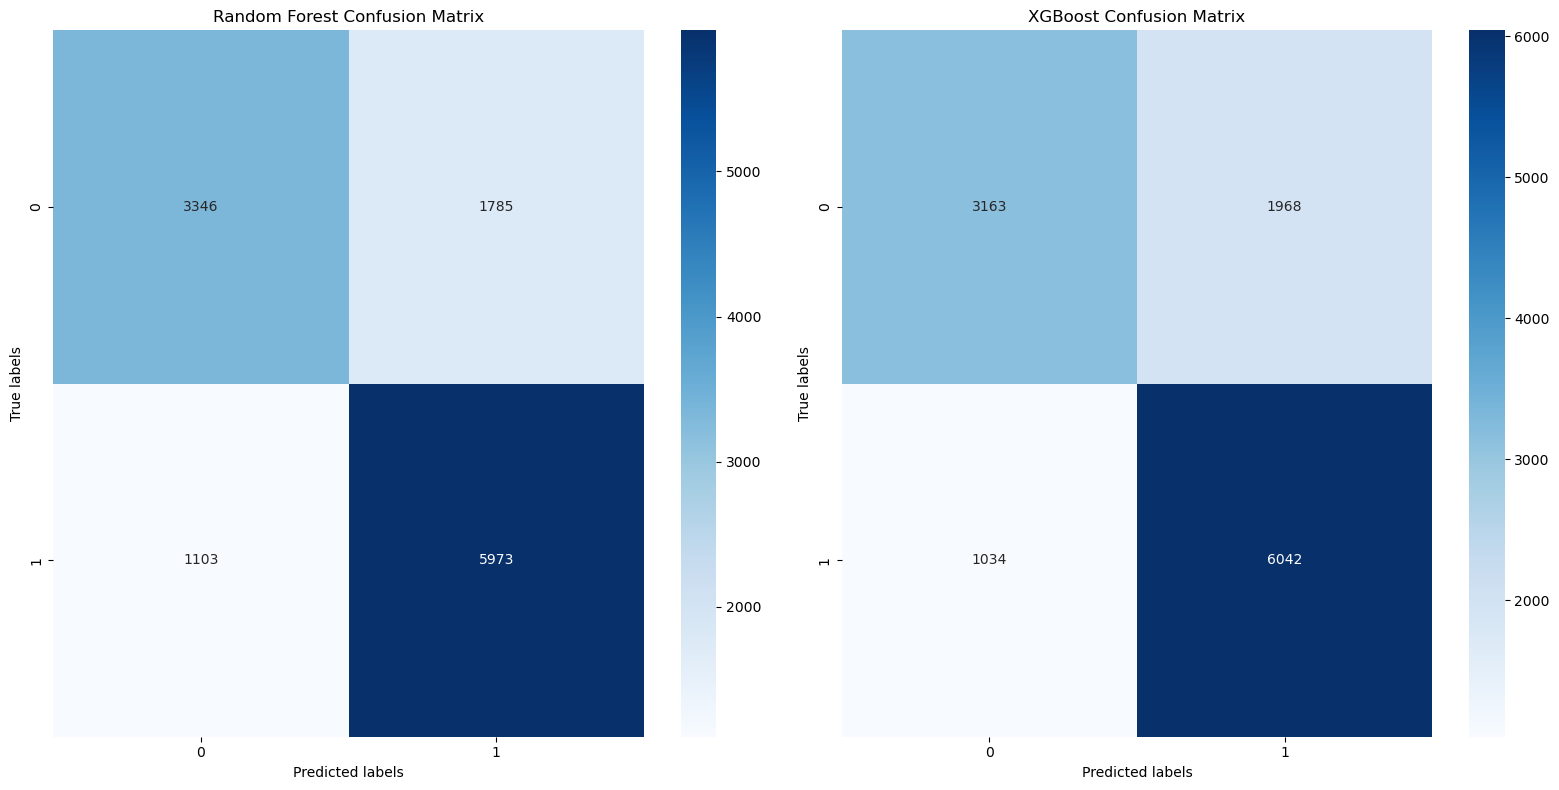

In [13]:
# Visualization of confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(rf_cm, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

sns.heatmap(xgb_cm, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('XGBoost Confusion Matrix')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')

plt.tight_layout()
plt.show()

In [16]:
# Return the performance metrics as a dictionary to capture the output
performance_metrics = {
    'rf': {'accuracy': rf_accuracy, 'report': rf_report},
    'xgb': {'accuracy': xgb_accuracy, 'report': xgb_report}
}

performance_metrics

{'rf': {'accuracy': 0.7634144343409519,
  'report': '              precision    recall  f1-score   support\n\n           0       0.75      0.65      0.70      5131\n           1       0.77      0.84      0.81      7076\n\n    accuracy                           0.76     12207\n   macro avg       0.76      0.75      0.75     12207\nweighted avg       0.76      0.76      0.76     12207\n'},
 'xgb': {'accuracy': 0.754075530433358,
  'report': '              precision    recall  f1-score   support\n\n           0       0.75      0.62      0.68      5131\n           1       0.75      0.85      0.80      7076\n\n    accuracy                           0.75     12207\n   macro avg       0.75      0.74      0.74     12207\nweighted avg       0.75      0.75      0.75     12207\n'}}

**Description of Dataset**

The e-commerce consumer behavior dataset serves as a rich repository of user interaction data with various products offered by an online retail service. This dataset, which includes 61,033 instances, offers a comprehensive view of consumer purchase patterns and product reorders.

Key Variables:
- Department: Categorical variable indicating the department to which a product belongs. Provides insights into department-wise sales and reorder tendencies.
- Product Name: Encodes the variety of products, allowing analysis of individual product performance.
- Order Details (Order ID, User ID, Order Number): These fields provide transactional data, enabling the tracking of orders across the consumer's purchasing timeline.
- Order Dow (Day of Week): Gives insights into the day-wise distribution of orders, which can be pivotal for planning weekly promotions.
- Order Hour of Day: Reflects the time at which orders are placed, useful for optimizing the timing of marketing campaigns.
- Days Since Prior Order: Indicates customer purchase frequency and can help identify loyal customers.
- Reordered: Binary target variable indicating whether a product was reordered. A critical variable for understanding customer retention and product lifecycle.

This dataset has undergone preprocessing during the 1st project to ensure standardization, enabling a fair comparison across various machine learning models.

**Objectives**

The primary goal of this analytical study is to conduct a detailed comparative evaluation of two advanced ensemble machine learning models—Random Forest and XGBoost—within the context of e-commerce consumer behavior prediction. The specific objectives include:

- To assess each model’s predictive accuracy for determining the likelihood of product reorders, an essential factor in inventory management and customer satisfaction.
- To compare the models based on key performance metrics such as precision, recall, and F1-score, which reflect the models' ability to handle the binary classification task effectively.
- To interpret the confusion matrices to understand the models' performance in correctly predicting reordered and non-reordered items, thereby evaluating the trade-offs between false positives and false negatives.
- To derive actionable managerial insights from the models’ performance that can guide decision-making in resource allocation, marketing strategies, and operational efficiencies.

**Observations**

Random Forest

    Accuracy: 76.34%
    Class 0 Precision: 75%, Recall: 65%, F1-Score: 70%
    Class 1 Precision: 77%, Recall: 84%, F1-Score: 81%
    Support: Class 0: 5131, Class 1: 7076

The Random Forest model demonstrates a strong performance with a notable balance between precision and recall across classes. This model is particularly strong in identifying reordered items (Class 1), which is crucial for inventory and stock management in an e-commerce context.
XGBoost

    Accuracy: 75.41%
    Class 0 Precision: 75%, Recall: 62%, F1-Score: 68%
    Class 1 Precision: 75%, Recall: 85%, F1-Score: 80%
    Support: Class 0: 5131, Class 1: 7076

XGBoost also shows a commendable performance, particularly with a higher recall for Class 1. This suggests that XGBoost is slightly more inclined towards minimizing false negatives for reordered items, which may be beneficial for ensuring customer satisfaction and loyalty through product availability.
Confusion Matrices Analysis

The confusion matrices provide deeper insight into the true positive and negative rates of each model.

    Random Forest:
        True Negatives: 3346
        False Positives: 1785
        False Negatives: 1103
        True Positives: 5973

    XGBoost:
        True Negatives: 3163
        False Positives: 1968
        False Negatives: 1034
        True Positives: 6042

Confusion Matrices Insights
- RF was more conservative in predicting reorders, as evidenced by the lower false positives but higher false negatives compared to XGB.
- XGB tended towards a liberal approach, with a higher number of true positives and false positives, which can be a strategic choice to ensure product availability.

**Managerial Insights**

Inventory Management
- RF's precision in non-reorders could help businesses avoid excess inventory and reduce holding costs. However, its higher false negative rate for reorders might lead to missed sales opportunities.
- XGB’s strong recall for reorders can inform a strategy that prioritizes product availability, catering to demand without significantly overstocking.

Marketing and Sales
- The insights from RF can assist in crafting conservative marketing strategies that focus on sure-sell items to reduce the risk of overpromising on stock availability.
- XGB’s ability to identify potential reorders aligns with aggressive marketing tactics, ensuring that products with high repurchase probabilities are heavily advertised and stocked.

Strategic Business Decisions
- The computational simplicity of RF might be advantageous for businesses seeking models that are relatively easy to interpret and implement.
- XGB's slight leniency in predicting reorders could be critical for businesses that prioritize customer experience over inventory cost management.
- An ensemble approach, leveraging both RF's precision and XGB's recall, could provide a balanced strategy for both customer satisfaction and inventory control.

Operational Efficiency
- Choosing between RF and XGB may also depend on the computational resources available. While both models are complex, XGB often provides faster performance on large datasets.
- The interpretability of RF might be beneficial for deriving strategic insights into customer purchasing patterns, while XGB's results could be more challenging to dissect due to its gradient boosting mechanism.

In making the final decision on model deployment, it’s crucial to align the choice with business objectives and the specific operational context. Both models offer substantial benefits, and their deployment should ideally be tailored to enhance business outcomes based on the trade-offs each model presents.